In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from collections import Counter

RGBA
(8, 8)
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>
(8, 8, 4)
_________________________________________________
[[[255, 255, 255, 255], [0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 255], [255, 255, 255, 255], [255, 255, 255, 255]], [[0, 0, 0, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [0, 0, 0, 255], [255, 255, 255, 255]], [[0, 0, 0, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [0, 0, 0, 255]], [[0, 0, 0, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [0, 0, 0, 255]], [[0, 0, 0, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [255, 255, 255, 255], [0, 0, 0, 255]], [[0, 0, 0, 255], [255, 255, 255, 255], [255, 255,

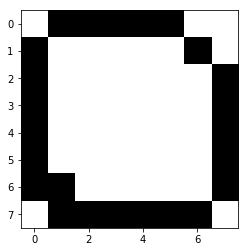

In [128]:
ei=Image.open("numbers/0.7.png")

print(ei.mode)
print(ei.size)

print(type(ei))
eiar=np.array(ei)
print(type(eiar))

eiar1= str(eiar.tolist())
print(eiar.shape)
print('_________________________________________________')
with open("Identyfy_char_or_Num_compare.txt",'w') as f:
    f.write(eiar1)
with open("Identyfy_char_or_Num_compare.txt",'r') as f:
    lines=f.read()
    print(lines)
    
print('____________________________________________________')    

plt.imshow(eiar)
plt.show()

In [53]:
os.chdir(r"C:\Users\india\OneDrive\opencv&prectice")
os.getcwd()

'C:\\Users\\india\\OneDrive\\opencv&prectice'

In [105]:
def createDb():
    with open("Idendtify_char_or_num_db.txt","w") as f:
        
        for i in range(10):
            for j in range(1,10):
                img=Image.open(r'numbers'+'/'+str(i)+'.'+str(j)+'.'+'png')
                e1=np.array(img)
                e2=str(e1.tolist())
                e3= str(i)+"::"+e2+"\n"
                f.write(e3)
    print('db created')    

In [106]:
createDb()

db created


In [221]:
def compare(path):
    img=Image.open(path)
    e0=np.asarray(img)
    e1=str(e0.tolist())
    #print(e1)
    with open("Idendtify_char_or_num_db.txt","r") as f:
        lines=f.readlines()
    array1=[]
    array2=[]
    array3=[]
    array4=[]
    #print(type(lines))
    #print(lines[0])
    for oneline in lines:
        #print(oneline)
        newline=oneline.split("::")
        #print(newline)
        currentNum=newline[0] #titles
        #print(currentNum)
        currentAr=newline[1]   #values
        #print(currentAr)
        eachPixEx =currentAr.split('],') #database
        #print(eachPixEx)
        eachPixInQ =e1.split('],')
        #print(eachPixInQ)
        x=0
        while x<len(eachPixEx):
            if eachPixEx[x]==eachPixInQ[x]:
                array1.append(int(currentNum))
                array2.append(eachPixEx)
            else:
                array3.append(int(currentNum))
                array4.append(eachPixEx)
                x=x+1
            x=x+1
    #print(array1)
    #print(array2)
    #print(array3)
    #print(array4)
    result1=Counter(array1)
    #result1=Counter(array2)
    result3=Counter(array3)
    #result1=Counter(array4)
    print ("Result1:",result1) 
    print("___________________________________________________________________________________________")
    print("result3:",result3)
    return result1,result3
    
                
    
    
    

In [222]:
result1,result3=compare("numbers/0.7.png")

Result1: Counter({0: 415, 8: 297, 3: 292, 2: 289, 5: 275, 6: 268, 9: 257, 7: 241, 4: 204, 1: 185})
___________________________________________________________________________________________
result3: Counter({1: 197, 4: 187, 7: 170, 9: 163, 6: 156, 5: 153, 2: 148, 3: 144, 8: 142, 0: 82})


In [223]:
print(type(result1))

<class 'collections.Counter'>


In [256]:
dict1=dict(result1)
dict1

{0: 415,
 1: 185,
 2: 289,
 3: 292,
 4: 204,
 5: 275,
 6: 268,
 7: 241,
 8: 297,
 9: 257}

In [257]:
dict2=dict(result3)
dict2

{0: 82, 1: 197, 2: 148, 3: 144, 4: 187, 5: 153, 6: 156, 7: 170, 8: 142, 9: 163}

In [258]:
print(dict1.keys())
print(dict1.values())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
dict_values([415, 185, 289, 292, 204, 275, 268, 241, 297, 257])


In [259]:
df=pd.DataFrame(dict1.values())
df['unmaches']=dict2.values()
df

0  unmaches
0  415        82
1  185       197
2  289       148
3  292       144
4  204       187
5  275       153
6  268       156
7  241       170
8  297       142
9  257       163

In [262]:
df.columns=["Matches","Unmatches"]
df

Matches  Unmatches
0      415         82
1      185        197
2      289        148
3      292        144
4      204        187
5      275        153
6      268        156
7      241        170
8      297        142
9      257        163

In [264]:
df['difference']=df['Matches']-df['Unmatches']
df

Matches  Unmatches  difference
0      415         82         333
1      185        197         -12
2      289        148         141
3      292        144         148
4      204        187          17
5      275        153         122
6      268        156         112
7      241        170          71
8      297        142         155
9      257        163          94

In [275]:
a=df['difference'].sum()

In [276]:
b=df['Matches'].sum()

In [271]:
c=df['Unmatches'].sum()

In [274]:
percent=b/(b+c)*100
percent

63.84525205158265